# 4. Model Evaluation and Submission

## 4.1 Load Model and Test Data

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load test data
X_test = joblib.load('../data/processed/X_test.pkl')
test_index = joblib.load('../data/processed/test_index.pkl')

# Load best model (XGBoost)
xgb_model = joblib.load('../models/xgboost_model.pkl')

print(f"Test samples: {len(X_test):,}")
print(f"Model loaded: XGBoost")

Test samples: 100,000
Model loaded: XGBoost


## 4.2 Generate Predictions

In [2]:
# Generate predictions
predictions = xgb_model.predict(X_test)

print("Prediction Statistics:")
print(f"  Min:    {predictions.min():>15,.0f} rubles")
print(f"  Max:    {predictions.max():>15,.0f} rubles")
print(f"  Mean:   {predictions.mean():>15,.0f} rubles")
print(f"  Median: {np.median(predictions):>15,.0f} rubles")
print(f"  Std:    {predictions.std():>15,.0f} rubles")

Prediction Statistics:
  Min:          4,938,318 rubles
  Max:         41,037,636 rubles
  Mean:        15,991,219 rubles
  Median:      14,904,738 rubles
  Std:          5,732,231 rubles


## 4.3 Create Submission File

In [3]:
import os
os.makedirs('../outputs', exist_ok=True)

# Create submission DataFrame
submission = pd.DataFrame({
    'index': test_index,
    'price': predictions
})

# Save to CSV
submission.to_csv('../outputs/submission.csv', index=False)

print("Submission file created: ../outputs/submission.csv")
print(f"\nSubmission shape: {submission.shape}")
print("\nFirst 10 predictions:")
submission.head(10)

Submission file created: ../outputs/submission.csv

Submission shape: (100000, 2)

First 10 predictions:


,index,price
0,0,18003246.0
1,1,15717191.0
2,2,12147230.0
3,3,9928601.0
4,4,9760828.0
5,5,38367204.0
6,6,18612012.0
7,7,19742926.0
8,8,22580384.0
9,9,16793876.0


## 4.4 Prediction Distribution

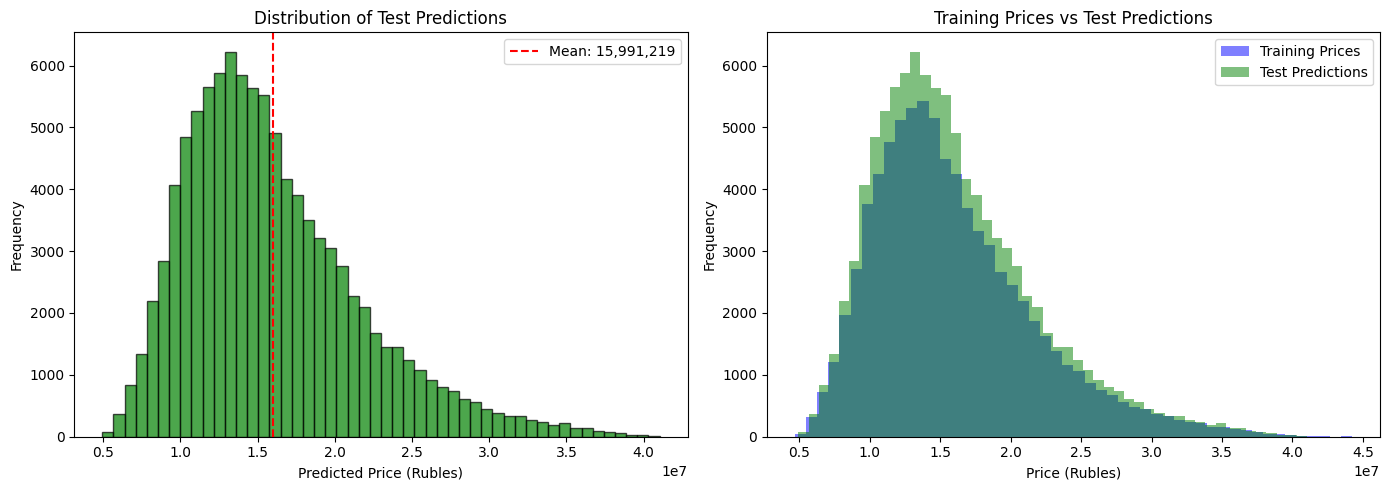

In [4]:
# Load training prices for comparison
y_train = joblib.load('../data/processed/y_train.pkl')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Prediction distribution
axes[0].hist(predictions, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0].axvline(predictions.mean(), color='red', linestyle='--', label=f'Mean: {predictions.mean():,.0f}')
axes[0].set_xlabel('Predicted Price (Rubles)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Test Predictions')
axes[0].legend()

# Comparison with training
axes[1].hist(y_train, bins=50, alpha=0.5, label='Training Prices', color='blue')
axes[1].hist(predictions, bins=50, alpha=0.5, label='Test Predictions', color='green')
axes[1].set_xlabel('Price (Rubles)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Training Prices vs Test Predictions')
axes[1].legend()

plt.tight_layout()
plt.show()

In [5]:
# Compare statistics
print("Distribution Comparison:")
print(f"{'Statistic':<15} {'Training':>15} {'Predictions':>15}")
print("-" * 45)
print(f"{'Min':<15} {y_train.min():>15,.0f} {predictions.min():>15,.0f}")
print(f"{'Max':<15} {y_train.max():>15,.0f} {predictions.max():>15,.0f}")
print(f"{'Mean':<15} {y_train.mean():>15,.0f} {predictions.mean():>15,.0f}")
print(f"{'Median':<15} {y_train.median():>15,.0f} {np.median(predictions):>15,.0f}")
print(f"{'Std':<15} {y_train.std():>15,.0f} {predictions.std():>15,.0f}")

Distribution Comparison:
Statistic              Training     Predictions
---------------------------------------------
Min                   4,680,680       4,938,318
Max                  44,233,822      41,037,636
Mean                 15,964,197      15,991,219
Median               14,840,290      14,904,738
Std                   5,754,301       5,732,231


## 4.5 Compare All Models

In [6]:
import tensorflow as tf

# Load all models
lr_model = joblib.load('../models/linear_regression.pkl')
nn_model = tf.keras.models.load_model('../models/neural_network.keras')
X_test_scaled = joblib.load('../data/processed/X_test_scaled.pkl')

# Generate predictions from all models
lr_test_pred = lr_model.predict(X_test)
nn_test_pred = nn_model.predict(X_test_scaled, verbose=0).flatten()

# Compare
print("Test Set Predictions Comparison:")
print(f"{'Model':<20} {'Mean Prediction':>20}")
print("-" * 42)
print(f"{'Linear Regression':<20} {lr_test_pred.mean():>20,.0f}")
print(f"{'XGBoost':<20} {predictions.mean():>20,.0f}")
print(f"{'Neural Network':<20} {nn_test_pred.mean():>20,.0f}")

Test Set Predictions Comparison:
Model                     Mean Prediction
------------------------------------------
Linear Regression              16,005,912
XGBoost                        15,991,219
Neural Network                 15,796,787


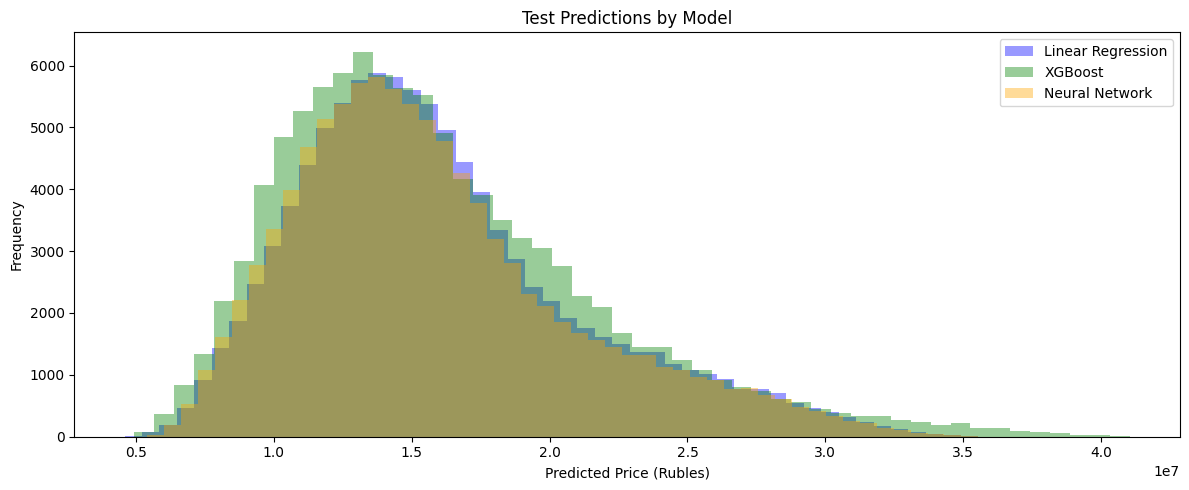

In [7]:
# Visualize model predictions comparison
fig, ax = plt.subplots(figsize=(12, 5))

ax.hist(lr_test_pred, bins=50, alpha=0.4, label='Linear Regression', color='blue')
ax.hist(predictions, bins=50, alpha=0.4, label='XGBoost', color='green')
ax.hist(nn_test_pred, bins=50, alpha=0.4, label='Neural Network', color='orange')

ax.set_xlabel('Predicted Price (Rubles)')
ax.set_ylabel('Frequency')
ax.set_title('Test Predictions by Model')
ax.legend()
plt.tight_layout()
plt.show()

## 4.6 Summary

- Used XGBoost model for final predictions
- Generated submission.csv for Kaggle
- Predictions follow similar distribution to training data